## Контрольная работа 4 Вариант 4

### Задача 1 Численное дифференцирование (1.5 балла)

Вычислить градиент, используя numpy функцию gradient:

- Построить функцию $f(x)=x \cdot e^{-x^2-y^2} \quad$ в области $[-2,2] \times[-2,2]$ с шагом $h_x=0.1 \quad$ и $h_y=0.1$
- Вычислить градиент и изобразить его на том же самом графике (как векторное поле)
- Вычислить погрешность относительно аналитической производной, используя np.linalg.norm.

>__Примечание.__ Векторное поле можно построить по аналогии с этим кодом:

>`x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))`
>
>`u = -x/np.sqrt(x\**2 + y\**2)`
>
>`v = y/np.sqrt(x\**2 + y\**2)`
>
>`plt.quiver(x,y,u,v)`
>
>`plt.show()`

### Задача 2  Численное интегрирование (4 балла)

Вычислить интеграл от осциллирующей функции с точностью $10^{-6}$ (Оценивать точность алгоритмом Рунге):

a) $\int_0^1 \frac{\sin 100 x d x}{1+x}$,

б) $\int_1^2 \cos 100 x \ln x d x$.


### Задача 3  Интерполяция (2 балла)

(Т. К. Старожилова) При исследовании некоторой химической реакции через каждые 2 секунды измерялась температура смеси. Результаты измерений представлены в таблице.

| $t, \mathrm{c}$ | 5 | 7 | 9 | 11 | 13 | 15 | 17 | 19 | 21 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| $T, \mathrm{~K}$ | 296 | 520 | 744 | 982 | 1248 | 1570 | 2256 | 2256 | 2256 |

С помощью сплайн-интерполяции найти $t^*$, при котором производная $d T / d t$ максимальна. Построить график интерполяции и удостовериться, что сплайн "не колеблется".


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import interpolate

Максимум производной при t = 19.19


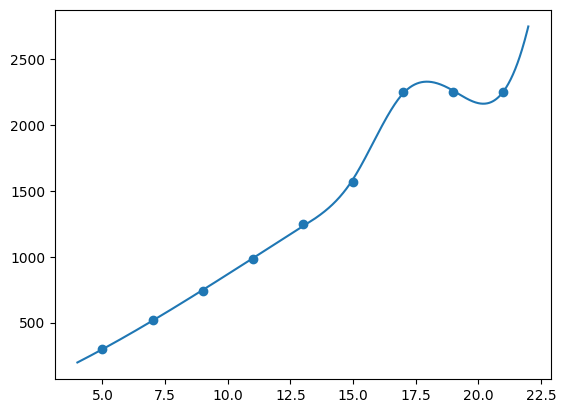

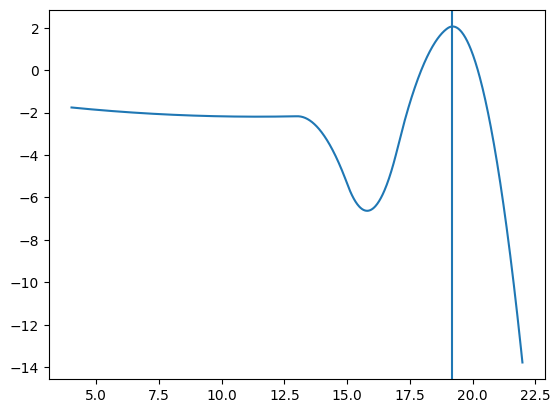

In [14]:
T = [296, 520, 744, 982, 1248, 1570, 2256, 2256, 2256]
t = [5, 7, 9, 11, 13, 15, 17, 19, 21]
interp = interpolate.UnivariateSpline(t, T, s = 1000)
t_line = np.linspace(np.min(t) - 1, np.max(t) + 1, 1000)
T_interp = interp(t_line)
interpolation_derivative = -np.roll(T_interp, -1) / 2 + np.roll(T_interp, 1) / 2
t_line_deriv, interpolation_derivative = t_line[1:-1], interpolation_derivative[1 :-1]
plt.plot(t_line, T_interp)
plt.scatter(t, T)
plt.figure()
result = t_line[np.argmax(interpolation_derivative)]
plt.plot(t_line_deriv, interpolation_derivative)
plt.axvline(result)
print(f"Максимум производной при t = {result:.2f}")

### Задача 4  Ряды (1 балл)

Вычислить сумму ряда

$$
\sum_{n=1}^{\infty} \frac{1}{n(n-1)-3^{-n}}
$$

с точностью $\varepsilon=10^{-6}$. Обоснуйте, почему исходная точность достигнута.

### Задача 5  Дискретное преобразование Фурье (1.5 балла)

Построить графики дискретного преобразования Фурье для

$$
x(k)=\left\{\begin{array}{c}
\cos \left(\frac{2 \pi}{N} k\right) + \mathcal{N}(\sigma, 0), \quad 0 \leq k \leq N-1, \\
0, \quad \text { при других } k .
\end{array}\right.
$$

при $N=128$ и $\sigma$ в промежутке от 0 до 0.5. Как изменяется картина спектра?

$\mathcal{N}(\sigma, 0)$ - гауссов шум с дисперсией $\sigma^2$.


In [18]:
import scipy.stats as sts
from scipy import fft

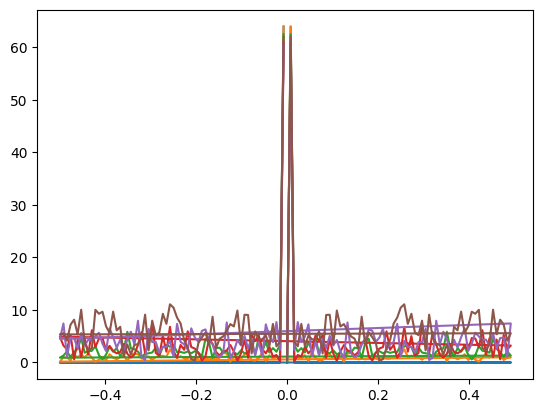

In [19]:
N = 128 
sigma_values = np.arange(0, 0.6, 0.1)
for sigma in sigma_values:
    k = np.arange(N)
    x = np.cos(2 * np.pi * k / N) + sts.norm(loc = 0, scale = sigma).rvs(N)
    freq = fft.fftfreq(x.shape[0], d = k[1] - k[0])
    amps = np.abs(fft.fft(x))
    plt.plot(freq, amps)